In [3]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 

In [4]:
dataset = pd.read_excel("/Users/rishavdas/Downloads/Data/HR_Employee_Attrition-1.xlsx")
dataset.head()

EmployeeNumber Attrition  Age     BusinessTravel  DailyRate  \
0               1       Yes   41      Travel_Rarely       1102   
1               2        No   49  Travel_Frequently        279   
2               3       Yes   37      Travel_Rarely       1373   
3               4        No   33  Travel_Frequently       1392   
4               5        No   27      Travel_Rarely        591   

               Department  DistanceFromHome  Education EducationField  \
0                   Sales                 1          2  Life Sciences   
1  Research & Development                 8          1  Life Sciences   
2  Research & Development                 2          2          Other   
3  Research & Development                 3          4  Life Sciences   
4  Research & Development                 2          1        Medical   

   EmployeeCount  ...  RelationshipSatisfaction StandardHours  \
0              1  ...                         1            80   
1              1  ...                         4            80   
2              1  ...                         2            80   
3              1  ...                         3            80   
4              1  ...                         4            80   

   StockOptionLevel  TotalWorkingYears  TrainingTimesLastYear WorkLifeBalance  \
0                 0                  8                      0               1   
1                 1                 10                      3               3   
2                 0                  7                      3               3   
3                 0                  8                      3               3   
4                 1                  6                      3               3   

   YearsAtCompany YearsInCurrentRole  YearsSinceLastPromotion  \
0               6                  4                        0   
1              10                  7                        1   
2               0                  0                        0   
3               8                  7                        3   
4               2                  2                        2   

   YearsWithCurrManager  
0                     5  
1                     7  
2                     0  
3                     0  
4                     2  

[5 rows x 35 columns]

## Continuos Bivariate Analysis

In [5]:
for i in dataset.select_dtypes('object').columns:
    dataset[i] = dataset[i].astype('category')

In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2940 entries, 0 to 2939
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   EmployeeNumber            2940 non-null   int64   
 1   Attrition                 2940 non-null   category
 2   Age                       2940 non-null   int64   
 3   BusinessTravel            2940 non-null   category
 4   DailyRate                 2940 non-null   int64   
 5   Department                2940 non-null   category
 6   DistanceFromHome          2940 non-null   int64   
 7   Education                 2940 non-null   int64   
 8   EducationField            2940 non-null   category
 9   EmployeeCount             2940 non-null   int64   
 10  EnvironmentSatisfaction   2940 non-null   int64   
 11  Gender                    2940 non-null   category
 12  HourlyRate                2940 non-null   int64   
 13  JobInvolvement            2940 non-null   int64 

## Attrition vs Employees Earning vs Salary Hike 

In [6]:
cols = dataset[['DailyRate', 'MonthlyIncome', 'PercentSalaryHike', 
               'HourlyRate', 'MonthlyRate']].columns.tolist()

In [7]:
cols

['DailyRate',
 'MonthlyIncome',
 'PercentSalaryHike',
 'HourlyRate',
 'MonthlyRate']

In [9]:
import warnings
warnings.filterwarnings('ignore')

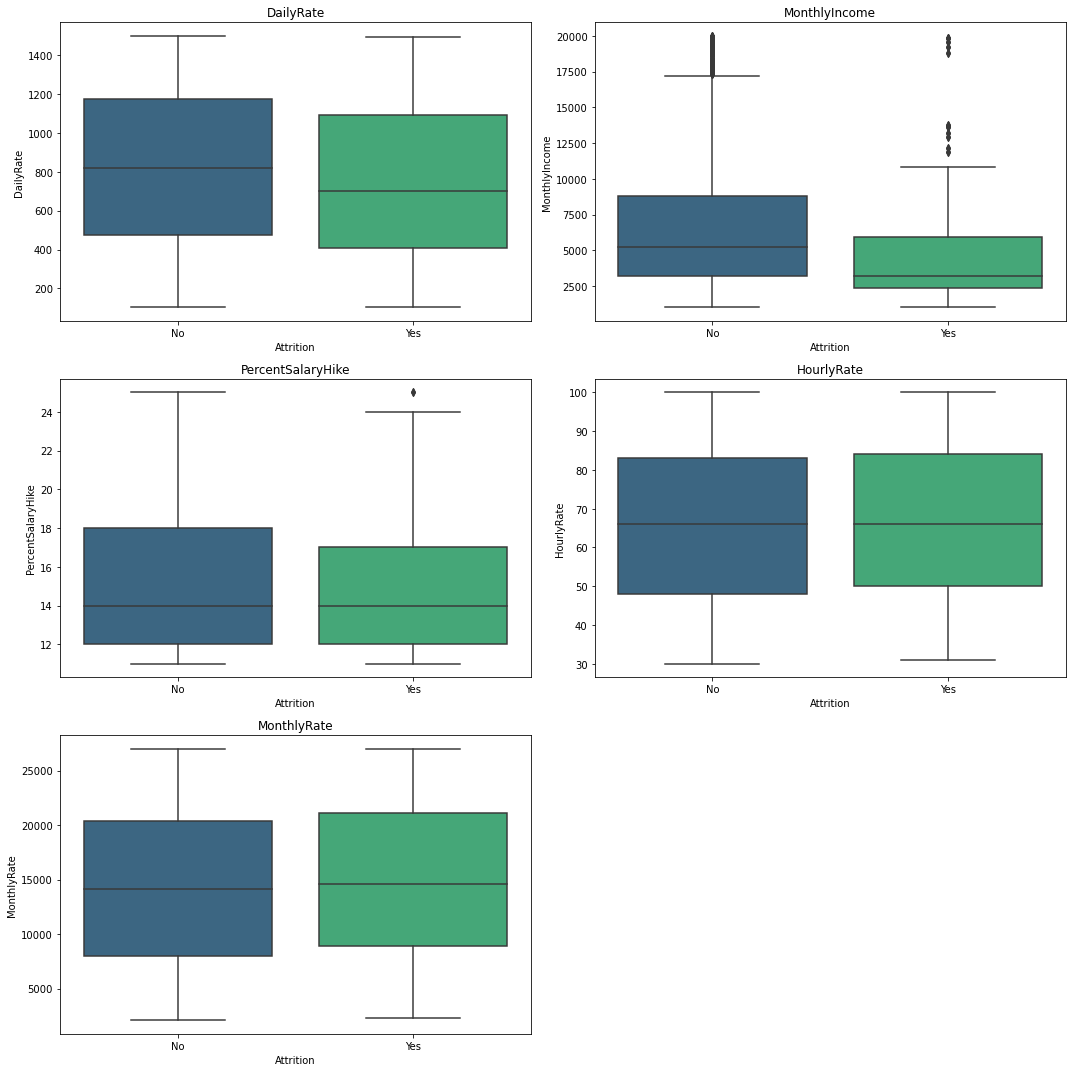

In [10]:
plt.figure(figsize=(15,15))
for i, variable in enumerate(cols):
    plt.subplot(3, 2, i+1)
    sns.boxplot(dataset['Attrition'], dataset[variable], palette='viridis')
    plt.tight_layout()
    plt.title(variable)
plt.show()

## Observation:
1. Daily Rate is lower for those who got attrited 
2. Mean of the monthly income for those who left is half og mean income for those who are working in the organization 
3. So income is major contributors 
4. as per EDA-PART-II,we have observed that higher Hike will reduce the Attrition rate given Monthly income is lesser than Avg
5. Hourly Rate, Monthly Rate are not impact because these are secondary income soruces 

## Attrition vs Experience in the Company 

In [11]:
cols = dataset[['YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager',
               'TrainingTimesLastYear']].columns.tolist()


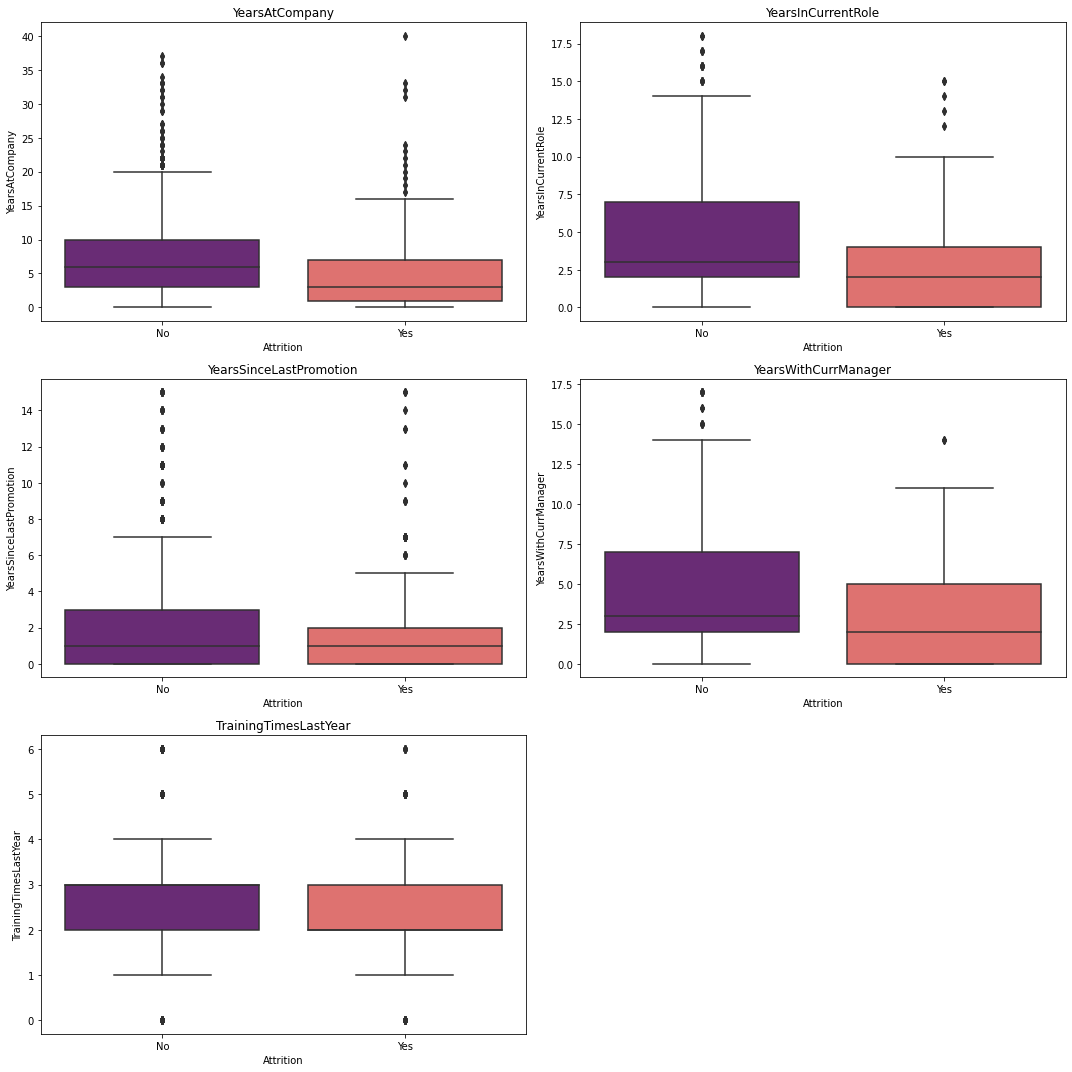

In [12]:
plt.figure(figsize=(15, 15))
for i, variable in enumerate(cols):
    plt.subplot(3, 2, i+1)
    sns.boxplot(dataset['Attrition'], dataset[variable], palette='magma')
    plt.tight_layout()
    plt.title(variable)
plt.show()

In [6]:
def continuos_univariate_analysis(data,
                                  feature,
                                  figsize=(12, 8),
                                  kde=False,
                                  bins=None):
    f1, (ax_box,
         ax_hist) = plt.subplots(nrows=2,
                                 sharex=True,
                                 gridspec_kw={'height_ratios': (0.25, 0.75)},
                                 figsize=figsize)
    sns.color_palette("viridis", as_cmap=True)
    sns.boxplot(data=data,
                x=feature,
                ax=ax_box,
                showmeans=True,
                color='yellow')
    sns.histplot(data=data,
                 x=feature,
                 ax=ax_hist,
                 showmeans=True,
                 color='crest',
                 bins=bins,
                 kde=kde) if bins else sns.histplot(
                     data=data, x=feature, ax=ax_hist, kde=kde, color='blue')
    ax_hist.axvline(data[feature].mean(), color='cyan', linestyle='--')
    ax_hist.axvline(data[feature].median(), color='orange', linestyle="-")

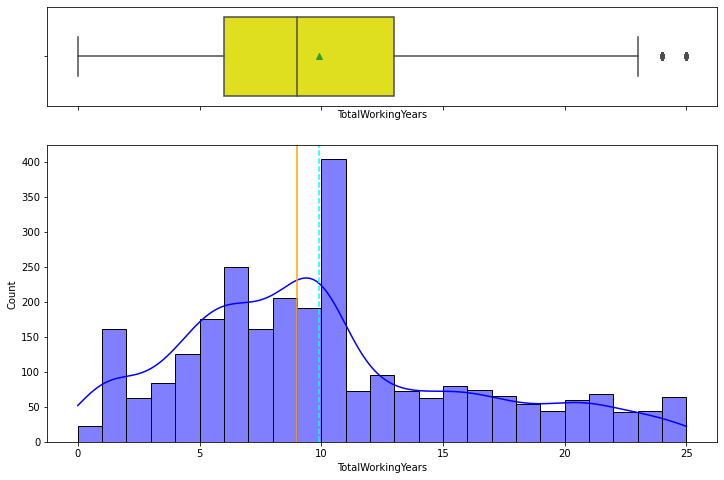

In [8]:
continuos_univariate_analysis(dataset[dataset['TotalWorkingYears']<=25], 'TotalWorkingYears', kde=True)

In [9]:
dataset[dataset['TotalWorkingYears']<=7]['EmployeeNumber'].count()

1044

In [15]:
dataset[dataset['TotalWorkingYears'] <= 7].groupby(['Attrition']).agg({
    'EmployeeNumber':
    'count',
    'MonthlyIncome':
    'mean',
    'TotalWorkingYears':
    'mean',
    'YearsAtCompany':
    'mean'
})

EmployeeNumber  MonthlyIncome  TotalWorkingYears  YearsAtCompany
Attrition                                                                  
No                    782    3585.777494           4.621483        3.429668
Yes                   262    2984.992366           3.595420        2.297710

## Observation:
1. Avg continuity is half of those who are working in the organization 
2. Those who are leaving the organization is typically having 1-7 years of experience 
3. Those who are experienced are not so frequently leaving the organization 
4. Those who are working in the organization for 2 years on Avg with lower income in its sample are more likely to leave the organization 
5. Those who are working in the current role for longer period of time tends to leave the organization 
6. Those who are not promoted more than 2 years are more impactful 
7. Training has no relation with Attrition 

## Discrete bivariate Analysis

In [18]:
def discrete_bivariate_analysis(data, predictor, target):
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab = pd.crosstab(data[predictor], data[target], margins=True).sort_values(by=sorter, ascending=False)
    print(tab)
    print('#'*50)
    tab2 = pd.crosstab(data[predictor], data[target], normalize='index').sort_values(by=sorter, ascending=False)
    tab2.plot(kind='bar', stacked=True, figsize=(count+1, 5))
    plt.legend(loc="lower left", frameon=True)
    plt.legend(loc="upper left", bbox_to_anchor=(1,1))
    plt.show()

Attrition            No  Yes   All
BusinessTravel                    
All                2466  474  2940
Travel_Rarely      1774  312  2086
Travel_Frequently   416  138   554
Non-Travel          276   24   300
##################################################


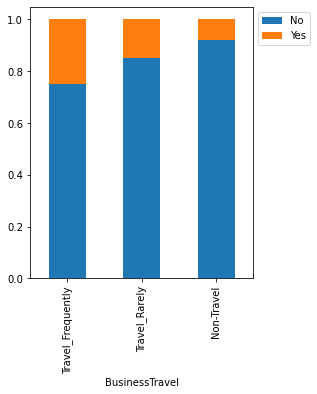

In [19]:
discrete_bivariate_analysis(dataset, 'BusinessTravel', 'Attrition')

## Observation: 
1. Travel Frequently has more attrition 
2. Those who are not travelling has lesser attrition rate 
3. 22% is highest contirbution across any feature after monthly income 


Attrition                 No  Yes   All
Department                             
All                     2466  474  2940
Research & Development  1656  266  1922
Sales                    708  184   892
Human Resources          102   24   126
##################################################


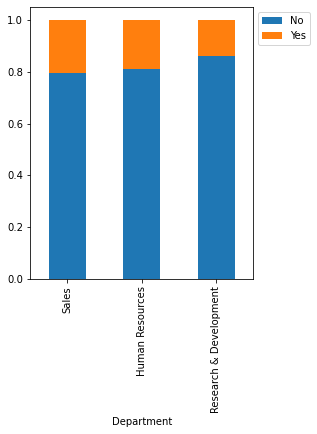

In [20]:
discrete_bivariate_analysis(dataset, 'Department', 'Attrition')

In [22]:
df = dataset.groupby(['Attrition', 'Department']).agg({
    'EmployeeNumber': 'count',
    'MonthlyIncome': 'mean',
    'PercentSalaryHike': 'mean',
}).reset_index()

In [23]:
df

Attrition              Department  EmployeeNumber  MonthlyIncome  \
0        No         Human Resources             102    7345.980392   
1        No  Research & Development            1656    6630.326087   
2        No                   Sales             708    7232.240113   
3       Yes         Human Resources              24    3715.750000   
4       Yes  Research & Development             266    4108.075188   
5       Yes                   Sales             184    5908.456522   

   PercentSalaryHike  
0          14.980392  
1          15.288647  
2          15.132768  
3          13.833333  
4          15.308271  
5          14.956522

## Observation:
1. Stratified attrition rate across different departments are bit risky (18-20%) 
2. HR has higher risk of attrition
3. HR is getting below salary hikes than AVg
4. Salary is below for all the department and probably because of that we get to observe  startified attrition across departments 


In [27]:
pd.pivot_table(df,
               index=['Department'],
               columns=['Attrition'],
               values=['EmployeeNumber', 'MonthlyIncome', 'PercentSalaryHike'])

EmployeeNumber      MonthlyIncome               \
Attrition                          No  Yes            No          Yes   
Department                                                              
Human Resources                   102   24   7345.980392  3715.750000   
Research & Development           1656  266   6630.326087  4108.075188   
Sales                             708  184   7232.240113  5908.456522   

                       PercentSalaryHike             
Attrition                             No        Yes  
Department                                           
Human Resources                14.980392  13.833333  
Research & Development         15.288647  15.308271  
Sales                          15.132768  14.956522